# CSV Data Explorer for Truck Retail Price Data

This notebook reads CSV files containing retail price data for trucks of different ages (3YO, 4YO, 5YO) and creates visualizations to compare trends.

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from datetime import datetime

In [14]:
# File paths
file_paths = {
    '3YO': 'C:\\Users\\clint\\Desktop\\Lifecycle_RA\\Data\\webplotdigitizer\\3YO.csv',
    '4YO': 'C:\\Users\\clint\\Desktop\\Lifecycle_RA\\Data\\webplotdigitizer\\4YO.csv',
    '5YO': 'C:\\Users\\clint\\Desktop\\Lifecycle_RA\\Data\\webplotdigitizer\\5YO.csv'
}

# Read CSV files
dfs = {}
for age, path in file_paths.items():
    if os.path.exists(path):
        df = pd.read_csv(path, header=None)
        if len(df.columns) >= 2:  # Ensure we have at least 2 columns
            # Rename columns for clarity
            df.columns = ['Date', 'Price'] if len(df.columns) == 2 else ['Date', 'Price'] + [f'Column_{i+3}' for i in range(len(df.columns)-2)]
            # Convert date column to datetime if it's not already
            try:
                df['Date'] = pd.to_datetime(df['Date'])
            except:
                print(f"Could not convert dates in {age} file. Check format.")
            dfs[age] = df
        else:
            print(f"File {path} doesn't have enough columns.")
    else:
        print(f"File {path} does not exist.")

# Display the first few rows of each dataframe
for age, df in dfs.items():
    print(f"\n{age} data:")
    print(df.head())


3YO data:
        Date         Price
0 2015-01-16  92092.885611
1 2015-01-20  91139.688310
2 2015-01-23  89841.139759
3 2015-01-26  88752.633467
4 2015-01-29  87607.264906

4YO data:
        Date         Price
0 2015-01-17  77306.593205
1 2015-01-21  76394.885565
2 2015-01-26  75248.656903
3 2015-01-29  74143.672157
4 2015-02-02  73084.641409

5YO data:
        Date         Price
0 2015-01-17  68710.037515
1 2015-01-22  68174.740697
2 2015-01-24  67257.535338
3 2015-01-29  66441.503756
4 2015-02-04  65381.080462


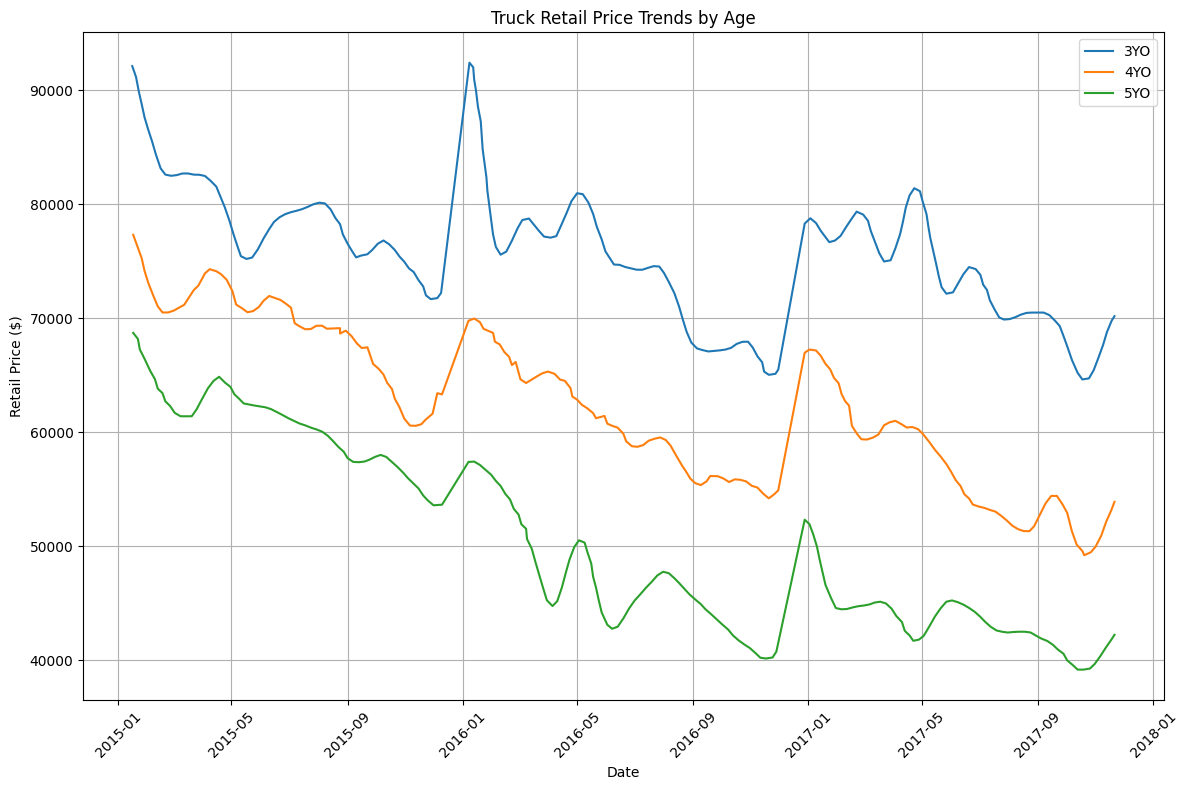

In [15]:
# Plot individual age data using matplotlib
plt.figure(figsize=(12, 8))

for age, df in dfs.items():
    plt.plot(df['Date'], df['Price'], label=age)

plt.title('Truck Retail Price Trends by Age')
plt.xlabel('Date')
plt.ylabel('Retail Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Interactive plotting with Plotly
# Combine all dataframes into one for Plotly
combined_data = []

for age, df in dfs.items():
    df_copy = df.copy()
    df_copy['Age'] = age
    combined_data.append(df_copy)

if combined_data:
    combined_df = pd.concat(combined_data, ignore_index=True)
    
    fig = px.line(combined_df, x='Date', y='Price', color='Age', 
                 title='Interactive Truck Retail Price Trends by Age',
                 labels={'Price': 'Retail Price ($)', 'Date': 'Date'},
                 line_shape='linear', render_mode='svg')
    
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Retail Price ($)',
        legend_title='Truck Age',
        hovermode='closest'
    )
    
    fig.show()
else:
    print("No data available to plot.")

## Data Analysis

Let's analyze some statistics about the truck retail price data for each age group:

In [17]:
# Calculate statistics for each age group
stats = {}

for age, df in dfs.items():
    stats[age] = {
        'Mean Price': df['Price'].mean(),
        'Median Price': df['Price'].median(),
        'Min Price': df['Price'].min(),
        'Max Price': df['Price'].max(),
        'Price Range': df['Price'].max() - df['Price'].min(),
        'Standard Deviation': df['Price'].std(),
        'Data Points': len(df)
    }

# Convert to DataFrame for better display
stats_df = pd.DataFrame(stats)
stats_df

,3YO,4YO,5YO
Mean Price,76052.586521,62277.281670,50454.466797
Median Price,76320.916832,61630.955800,47452.058916
Min Price,64627.800455,49223.202549,39193.104460
Max Price,92395.067955,77306.593205,68710.037515
Price Range,27767.267500,28083.390656,29516.933055
Standard Deviation,5957.619236,6935.970708,8191.369415
Data Points,202.000000,183.000000,187.000000


## Price Depreciation Analysis

Let's analyze how truck prices depreciate with age:

Average prices by age:
3YO: $76052.59
4YO: $62277.28
5YO: $50454.47

Depreciation rates:
3YO to 4YO: 18.11%
4YO to 5YO: 18.98%
3YO to 5YO: 33.66%


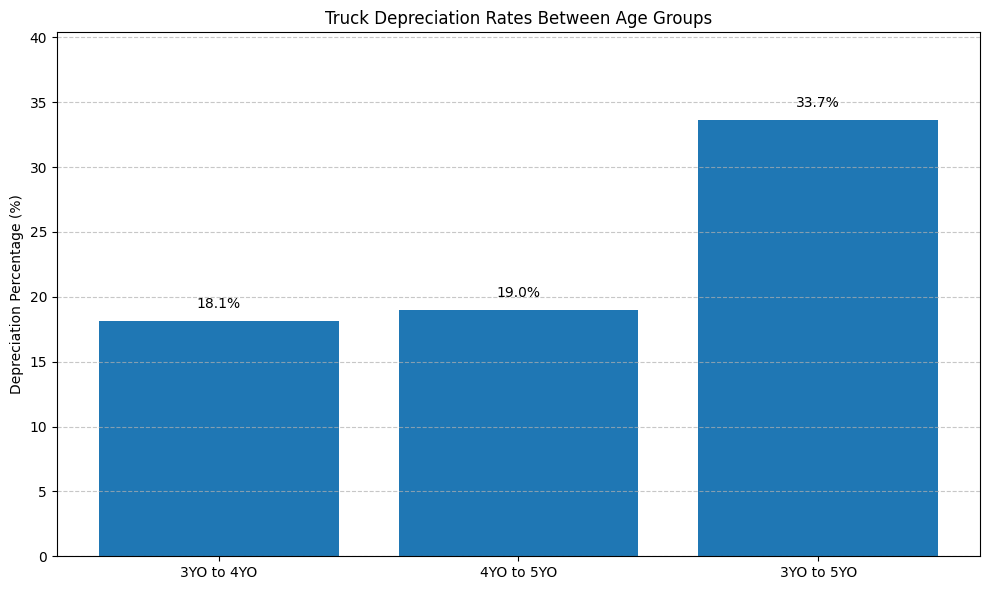

In [18]:
# Create a summary of average prices by age
avg_prices = {age: df['Price'].mean() for age, df in dfs.items()}

# Calculate depreciation percentages
if '3YO' in avg_prices and '4YO' in avg_prices and '5YO' in avg_prices:
    depreciation = {
        '3YO to 4YO': (1 - avg_prices['4YO']/avg_prices['3YO']) * 100,
        '4YO to 5YO': (1 - avg_prices['5YO']/avg_prices['4YO']) * 100,
        '3YO to 5YO': (1 - avg_prices['5YO']/avg_prices['3YO']) * 100
    }
    
    print("Average prices by age:")
    for age, price in avg_prices.items():
        print(f"{age}: ${price:.2f}")
    
    print("\nDepreciation rates:")
    for period, rate in depreciation.items():
        print(f"{period}: {rate:.2f}%")
    
    # Create bar chart for depreciation
    plt.figure(figsize=(10, 6))
    plt.bar(depreciation.keys(), depreciation.values())
    plt.title('Truck Depreciation Rates Between Age Groups')
    plt.ylabel('Depreciation Percentage (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, max(depreciation.values()) * 1.2)  # Add some headroom
    
    # Add value labels on top of bars
    for i, (key, value) in enumerate(depreciation.items()):
        plt.text(i, value + 1, f'{value:.1f}%', ha='center')
        
    plt.tight_layout()
    plt.show()
else:
    print("Missing data for one or more age groups")